# -----------------------------------------------------------------------------------
# Linear Regression
# -----------------------------------------------------------------------------------

In [1]:
import numpy as np
from numpy import linalg as LA

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def normalize(x):
    mu = np.mean(x)
    std = np.std(x)
    
    apply = np.vectorize(lambda z: (z - mu) / std)
    return apply(x)

def read_data(xf, yf, delimiter=','):
    x = np.loadtxt(xf, delimiter=delimiter)

    try:
        m, n = x.shape[0], x.shape[1]
    except IndexError:
        m, n = (x.shape[0], 1)

    # The intercept term
    x0 = np.ones(m)

    # Normalization
    x = normalize(x)

    X = np.c_[x0, x]
    y = np.loadtxt(yf)
    
    return X, y, m, n

def plot_hypothesis(X, y, theta):
    plt.plot(X[:,1], y, 'rx')
    plt.plot(X[:,1], list(map(lambda x: theta @ x, X)), 'b')

In [126]:
X, y, m, n = read_data("data/linearX.csv", "data/linearY.csv")

def J(theta):
    return np.sum((X @ theta - y) ** 2) / (2)

# Store points to plot later
error_plot_points = []

# Theta - the prameters we are looking for
# Intialized to a vector of all zeros
theta = np.zeros(n+1)

# The learning rate
eta = 0.001

# Count the number of iterations it took for convergence
iters = 0

# Error at zero theta
Jn = J(theta)
converged = False

print("Learning Rate: ", eta)
print("Initial Error: ", Jn)

while (not converged):
# for _ in range(10):
    theta = theta - eta * (X @ theta - y) @ X

    # Calculate new error and check convergence
    Jp = Jn
    Jn = J(theta)

    if (iters % 5) == 0:
        error_plot_points.append((theta, Jn))
    
    if Jp - Jn < 10 ** -15:
        converged = True
        
    iters += 1
     

print("Final Error: ", Jn)
print("Number of iterations: ", iters)
print("Parameters: ", theta)


Learning Rate:  0.001
Initial Error:  49.6627904715
Final Error:  0.000119478981102
Number of iterations:  176
Parameters:  [ 0.99662009  0.0013402 ]


### Analytical Solution

In [118]:
theta_analytical = np.linalg.pinv(X.T @ X) @ X.T @ y
theta_analytical

array([ 0.9966201,  0.0013402])

### Plotting the Hypothesis

[ 0.99662009  0.0013402 ]


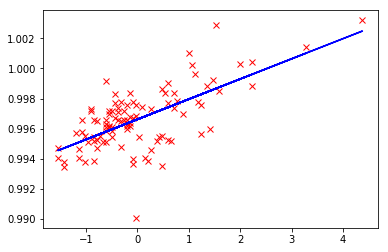

In [119]:
print(theta)
plot_hypothesis(X, y, theta)

[ 0.9966201  0.0013402]


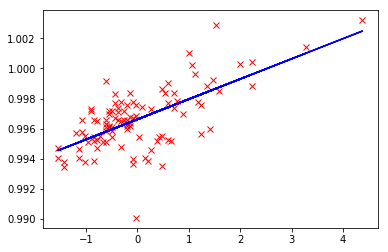

In [121]:
print(theta_analytical)
plot_hypothesis(X, y, theta_analytical)

## (b.) 3 D Error Plot

In [16]:
%matplotlib inline
# %matplotlib qt

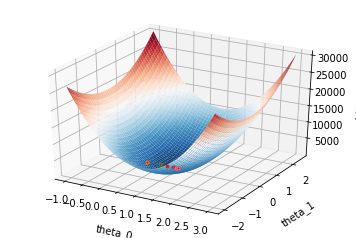

In [108]:
# Compute J_theta for the grid

T0 = np.linspace(-1, 3, num=100)
T1 = np.linspace(-2, 2.5, num=100)
T0, T1 = np.meshgrid(T0, T1)

J_theta = np.zeros(shape=T0.shape)
for i in range(0, len(T0)):
    for j in range(0, len(T1)):
        J_theta[i][j] = J(np.array([[T0[i][j]],[T1[i][j]]]))
        
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0, T1, J_theta, cmap=cm.RdBu_r)
ax.set_xlabel('theta_0', labelpad=10)
ax.set_ylabel('theta_1', labelpad=10)
ax.set_zlabel('J (theta)', labelpad=10)

# Plot points that were taken during gradient descent
for t, j in error_plot_points:
    point, = ax.plot([t[0]], [t[1]], [j], markerfacecolor='r', marker='o', markersize=3)

plt.show()

# ------------------------------------------------------------------------------------------------------

#                              Locally Weighted Linear Regression

# ------------------------------------------------------------------------------------------------------

Parameters: [ 1.03128116  0.83519315]


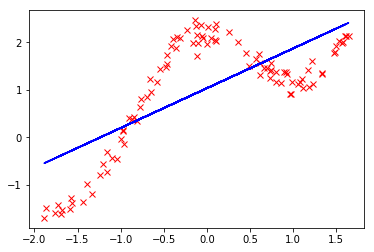

In [122]:
X, y, m, n = read_data("data/weightedX.csv", "data/weightedY.csv")

theta = np.linalg.pinv(X.T @ X) @ X.T @ y

print("Parameters:", theta)
plot_hypothesis(X, y, theta)

Tau:  0.1


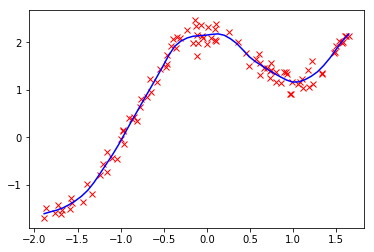

Tau:  0.3


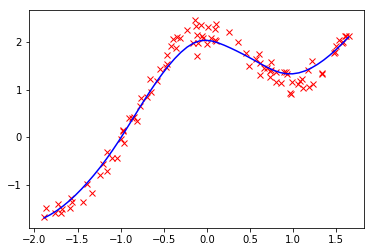

Tau:  0.8


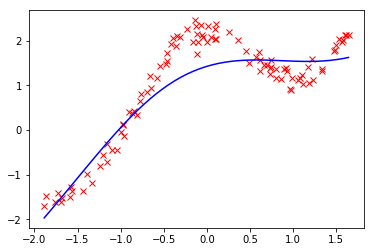

Tau:  2


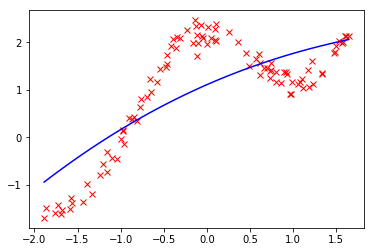

Tau:  10


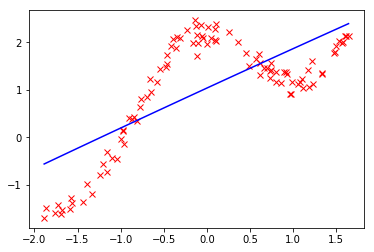

In [123]:
# Calculate the weight matrix for a given query point x
def weight_matrix(X, x, tau):
    return np.diag(np.exp( -1 * ((x - X[:, 1])**2 / (2 * tau ** 2)) ))

# Find some query points in the range of x
s = np.amin(X[:,1])
e = np.amax(X[:,1])
query_points = np.linspace(s, e)

def tau_effect(tau):

    # Run Weighted regression on the query points
    result = []
    for x in query_points:
        W = weight_matrix(X, x, tau)
        theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
        result.append(theta @ np.array([1, x]))

    # Plot it!
    plt.plot(X[:, 1], y, 'rx')
    plt.plot(query_points, result, 'b')
    plt.show()

for tau in [0.1, 0.3, 0.8, 2, 10]:
    print("Tau: ", tau)
    tau_effect(tau)

# ------------------------------------------------------------------------------------------------------

#                              Logistic Regression

# ------------------------------------------------------------------------------------------------------

In [141]:
xf, yf = "data/logisticX.csv", "data/logisticY.csv"
X = np.loadtxt(xf, delimiter=',')
m, n = x.shape

x0 = np.ones(m)
x1 = normalize(X[:, 0])
x2 = normalize(X[:, 1])

X = np.c_[x0, x1, x2]
y = np.loadtxt(yf)

In [142]:
theta = np.zeros(n+1)

def g(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    """Hypothesis function for logistic regression."""
    return g(X @ theta)

def gradient(X, y, theta):
    """Gradient of the log-likelihood function."""
    return X.T @ ( y - h(X, theta) )

def hessian(X, theta):
    """Hessian of the log-likelihood function."""

    # The diagonal sigmoid matrix
    # https://stats.stackexchange.com/a/316933
    # -1 * g(X, theta) * (1 - g(X, theta)) * X @ X.T
    G = h(X, theta)
    D = np.diag( G * (1 - G) )

    return X.T @ D @ X

def L(X, y, theta):
    """The log-likelihood function for logistic regression."""
    return -1 * ( np.sum(y * np.log(h(X, theta)) + (1-y) * np.log(1 - h(X, theta))) )

# The newton's method
converged = False
theta = np.zeros(n+1)

Ln = L(X, y, theta)
print("Initial Error: ", Ln)

iters = 0

while not converged:
# for _ in range(50):
    theta = theta + np.linalg.pinv(hessian(X, theta)) @ gradient(X, y, theta)
    
    Lp = Ln
    Ln = L(X, y, theta)
    
    if Lp - Ln < 10**-12:
        converged = True
    
    iters += 1
    
print("Final Error: ", Ln)
print("Number of iterations: ", iters)
print("Parameters: ", theta)

Initial Error:  69.314718056
Final Error:  22.8341449845
Number of iterations:  8
Parameters:  [ 0.40125316  2.5885477  -2.72558849]


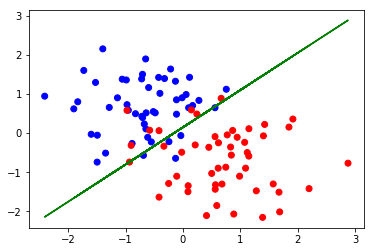

In [143]:
def find_x2(x, t=theta):
    """The equation """
    return (-t[0] - t[1]*x[1]) / t[2]

colors = ["r" if cls else "b" for cls in y]
plt.scatter(X[:, 1], X[:, 2], c=colors)
plt.plot(X[:,1], list(map(find_x2, X)), 'g')
plt.show()

# ------------------------------------------------------------------------------------------------------

#                              Gaussian Discriminant Analysis

# ------------------------------------------------------------------------------------------------------

In [186]:
xf, yf = "data/q4x.dat", "data/q4y.dat"
X = np.loadtxt(xf)
m, n = X.shape

x0 = normalize(X[:, 0])
x1 = normalize(X[:, 1])
X = np.c_[x0, x1]

y = np.loadtxt(yf, dtype='str')

data = np.c_[X, y]
X_alaska = X[np.where(data[:, 2] == "Alaska")]
X_canada = X[np.where(data[:, 2] == "Canada")]

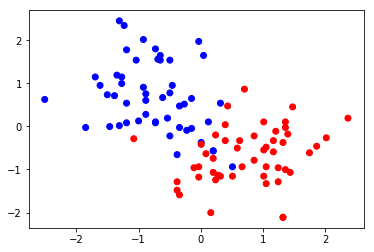

In [187]:
colors = ["r" if cls == "Canada" else "b" for cls in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

In [188]:
from collections import Counter

def bin_cls(Y, cls):
    """Convert y array to 1,0 (from Alaska/Canada)"""
    r = np.vectorize(lambda y: int(y == cls))(Y)
    return np.c_[r, r] 

counts = Counter(y)
classes = list(set(y))

y0 = "Alaska"
y1 = "Canada"

phi = counts[y0] / m

mu = np.array([
        np.sum(X * bin_cls(y, y0), axis=0) / counts[y0],
        np.sum(X * bin_cls(y, y1), axis=0) / counts[y1] 
    ])

print("Phi", phi)
print("Mu_0", mu[0])
print("Mu_1", mu[1])

Phi 0.5
Mu_0 [-0.75529433  0.68509431]
Mu_1 [ 0.75529433 -0.68509431]


In [189]:
phi = len(X_alaska) / m
mu = np.array([ np.mean(X_alaska, axis=0), np.mean(X_canada, axis=0)])

print("Phi", phi)
print("Mu_0", mu[0])
print("Mu_1", mu[1])

Phi 0.5
Mu_0 [-0.75529433  0.68509431]
Mu_1 [ 0.75529433 -0.68509431]


In [190]:
sigma = np.zeros(shape=(n, n))

for i in range(m):
    mu_i = mu[classes.index(y[i])]
    sigma += np.outer((X[i] - mu_i), (X[i] - mu_i))

sigma = sigma / m

print("Sigma", sigma)

Sigma [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [119]:
p = np.concatenate((X_alaska - mu[0], X_canada - mu[1]))
sigma = p.T @ p / m
print("Sigma", sigma)

Sigma [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


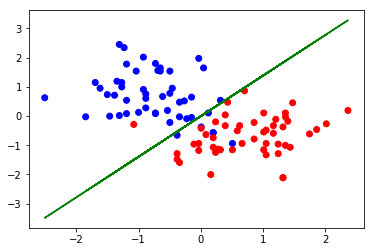

In [191]:
# Plot the linear decision boundary

# Parameters of the line equation: AX - B = 0
A = 2 * (mu[0] - mu[1]).T @ LA.inv(sigma)

B = (
    (mu[0].T @ LA.inv(sigma) @ mu[0]) -
    (mu[1].T @ LA.inv(sigma) @ mu[1]) -
    2 * np.log((1 / phi) - 1)
)

# Plot data points
X0, X1 = X[:, 0], X[:, 1]
plt.scatter(X0, X1, c=colors)

# Plot line
X1 = (B - A[0] * X0) / (A[1])
plt.plot(X0, X1, "g")

plt.show()

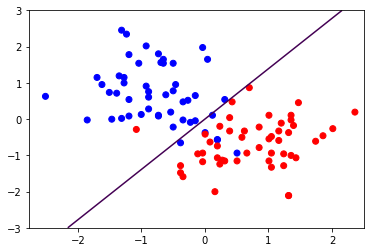

In [196]:
# Plot line (using Grid)
p, q = np.mgrid[-2.5:2.5:50j, -3:3:50j]
M = np.c_[p.flatten(), q.flatten()]

line = (A @ M.T + B).reshape(50, 50)

# Plot data points
X0, X1 = X[:, 0], X[:, 1]
plt.scatter(X0, X1, c=colors)

plt.contour(p, q, line, [0])
plt.show()

In [197]:
# GDA with different covariance matrices
phi = len(X_alaska) / m

mu = [ X_alaska.mean(axis=0), X_canada.mean(axis=0) ]

sigma = [ 
    # The outer product!
    (X_alaska - mu[0]).T @ (X_alaska - mu[0]) / len(X_alaska),
    (X_canada - mu[1]).T @ (X_canada - mu[1]) / len(X_canada)
]

print("Phi", phi)
print("Mu_0", mu[0])
print("Mu_1", mu[1])
print("Sigma_0", sigma[0])
print("Sigma_1", sigma[1])

Phi 0.5
Mu_0 [-0.75529433  0.68509431]
Mu_1 [ 0.75529433 -0.68509431]
Sigma_0 [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
Sigma_1 [[ 0.47747117  0.1099206 ]
 [ 0.1099206   0.41355441]]


In [198]:
# Inverse and Determinant of sigma_0/1 
sigma_i = [LA.inv(sig) for sig in sigma]
sigma_d = [LA.det(sig) for sig in sigma]

# Parameters for equation of the decision boundary: X'AX + BX + C = 0
# Compare these with the straight line equations
A = (sigma_i[0] - sigma_i[1])
B = -2 * ((mu[0].T @ sigma_i[0]) - (mu[1].T @ sigma_i[1]))
C = (
    (mu[0].T @ sigma_i[0] @ mu[0]) -
    (mu[1].T @ sigma_i[1] @ mu[1]) -
    2 * np.log(((1 / phi) - 1) * (sigma_d[1] / sigma_d[0]))
)
print("---", A, "\n", B, "\n", C)

--- [[ 0.6713478   1.28683634]
 [ 1.28683634 -0.86593198]] 
 [ 7.61570639 -5.71934613] 
 -0.983961213006


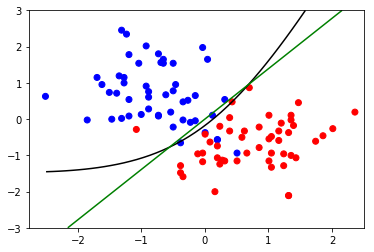

In [203]:
p, q = np.mgrid[-2.5:2.5:50j, -3:3:50j]
M = np.c_[p.flatten(), q.flatten()]

def bdry(x):
    return x.T @ A @ x + B @ x + C

# Entire mesh at once ?!

# bdry = M @ A.T @ M.T + B @ M.T + C
# bdry = bdry.reshape(2500, 2500)
# bdry = bdry[:, 1].reshape(50, 50)

# np.vectorize(bdry)(X)

# Point by Point
hyp = np.array([bdry(m) for m in M]).reshape(50, 50)

# Plot data points
X0, X1 = X[:, 0], X[:, 1]
plt.scatter(X0, X1, c=colors)
plt.contour(p, q, hyp, [0], colors="k")
plt.contour(p, q, line, [0], colors="g")
plt.show()